In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pystan
import scipy.stats as stats

import scipy.stats as stats

### Estimating parameters of a linear regreession model

We will show how to estimate regression parameters using a simple linear modesl

$$
y \sim ax + b
$$

We can restate the linear model $$y = ax + b + \epsilon$$ as sampling from a probability distribution

$$
y \sim \mathcal{N}(ax + b, \sigma^2)
$$

We will assume the following priors

$$
a \sim \mathcal{N}(0, 100) \\
b \sim \mathcal{N}(0, 100) \\
\sigma \sim \mathcal{U}(0, 20)
$$

In [3]:
lin_reg_code = """
data {
    int<lower=0> n; 
    real x[n];
    real y[n]; 
}
transformed data {}
parameters {
    real a;
    real b;
    real sigma;
}
transformed parameters {
    real mu[n];
    for (i in 1:n) {
        mu[i] <- a*x[i] + b;
        }
}
model {
    sigma ~ uniform(0, 20);
    y ~ normal(mu, sigma);
}
generated quantities {}
"""

n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

lin_reg_dat = {
             'n': n,
             'x': x,
             'y': y
            }

fit = pystan.stan(model_code=lin_reg_code, data=lin_reg_dat, iter=1000, chains=1)

In [4]:
print(fit)

Inference for Stan model: anon_model_4bdbb0aeaf5fafee91f7aa8b257093f2.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        5.74    0.15    1.3   3.03    4.9   5.82   6.59   8.25     80    1.0
b        2.06    0.09   0.78   0.57   1.54   2.03   2.52   3.77     78    1.0
sigma    1.38    0.04    0.4   0.81   1.09    1.3   1.58   2.33     89    1.0
mu[0]    2.06    0.09   0.78   0.57   1.54   2.03   2.52   3.77     78    1.0
mu[1]    2.63    0.08   0.68   1.34   2.19    2.6   3.02   4.08     80    1.0
mu[2]     3.2    0.06   0.58   2.09   2.83   3.17   3.53   4.44     85    1.0
mu[3]    3.78    0.05    0.5   2.73   3.47   3.76   4.08   4.82     95    1.0
mu[4]    4.35    0.04   0.44   3.49   4.07   4.35   4.63   5.22    115    1.0
mu[5]    4.93    0.03   0.42    4.1   4.64   4.92    5.2   5.78    150    1.0
mu[6]     5.5    0.03   0.43    4.

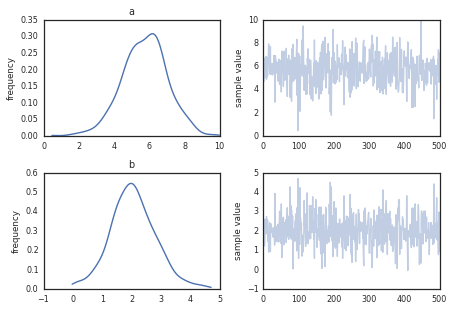

In [5]:
fit.plot(['a', 'b']);
plt.tight_layout()